In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data_ticker = yf.download("INTC", period="5y")
percentage_changes = data_ticker["Close"].pct_change() * 100
percentage_changes = percentage_changes.dropna()

print(percentage_changes)

rounded_percentage_changes = ((percentage_changes * 2).round())/200
print()

print(rounded_percentage_changes)
frequency = rounded_percentage_changes.value_counts(normalize=True)
frequency = frequency.sort_index()
print(type(frequency))



[*********************100%***********************]  1 of 1 completed

Date
2019-09-12     0.416741
2019-09-13    -0.886620
2019-09-16    -0.647126
2019-09-17    -0.478927
2019-09-18    -0.404233
2019-09-19    -0.328570
2019-09-20    -1.648242
2019-09-23     0.354890
2019-09-24    -2.121811
2019-09-25     2.408673
2019-09-26    -0.196006
2019-09-27    -0.274940
2019-09-30     1.476959
2019-10-01    -1.494276
2019-10-02    -2.698974
2019-10-03     1.295808
2019-10-04     1.778931
2019-10-07    -0.589158
2019-10-08    -1.758197
2019-10-09     1.508144
2019-10-10     1.248021
2019-10-11     1.917432
2019-10-14    -0.863891
2019-10-15     1.955852
2019-10-16    -0.379868
2019-10-17    -1.124881
2019-10-18    -0.964134
2019-10-21     1.499222
2019-10-22    -0.230199
2019-10-23    -0.557580
2019-10-24     0.986076
2019-10-25     8.098793
2019-10-28     0.531348
2019-10-29    -0.739955
2019-10-30     0.461481
2019-10-31    -0.123674
2019-11-01    -0.035380
2019-11-04     1.946562
2019-11-05    -0.104151
2019-11-06     0.086880
2019-11-07     0.781251
2019-11-08 

In [2]:
from collections import Counter


values = frequency.index.to_numpy()
prob_distribution = frequency.values

prices = []
last_close = data_ticker["Close"].tail(1).values[0]
prices.append(last_close)
for i in range(0, 100):
    np.random.seed(i)
    curr_price = last_close
    for j in range(1, 252):
        percent_change = np.random.choice(values, p=prob_distribution)
        curr_price *= (1 + percent_change)
    prices.append(curr_price)

rounded_prices = [round(price) for price in prices]
freq = Counter(rounded_prices)
price_distribution = dict(sorted(freq.items()))

for key, value in price_distribution.items():
    print(f"{key}: {value}")


6: 1
7: 5
8: 3
9: 7
10: 6
11: 8
12: 11
13: 6
14: 10
15: 6
16: 4
17: 2
18: 4
19: 4
20: 4
21: 4
22: 3
23: 1
24: 4
25: 1
26: 1
27: 1
28: 1
34: 1
35: 1
37: 1
41: 1


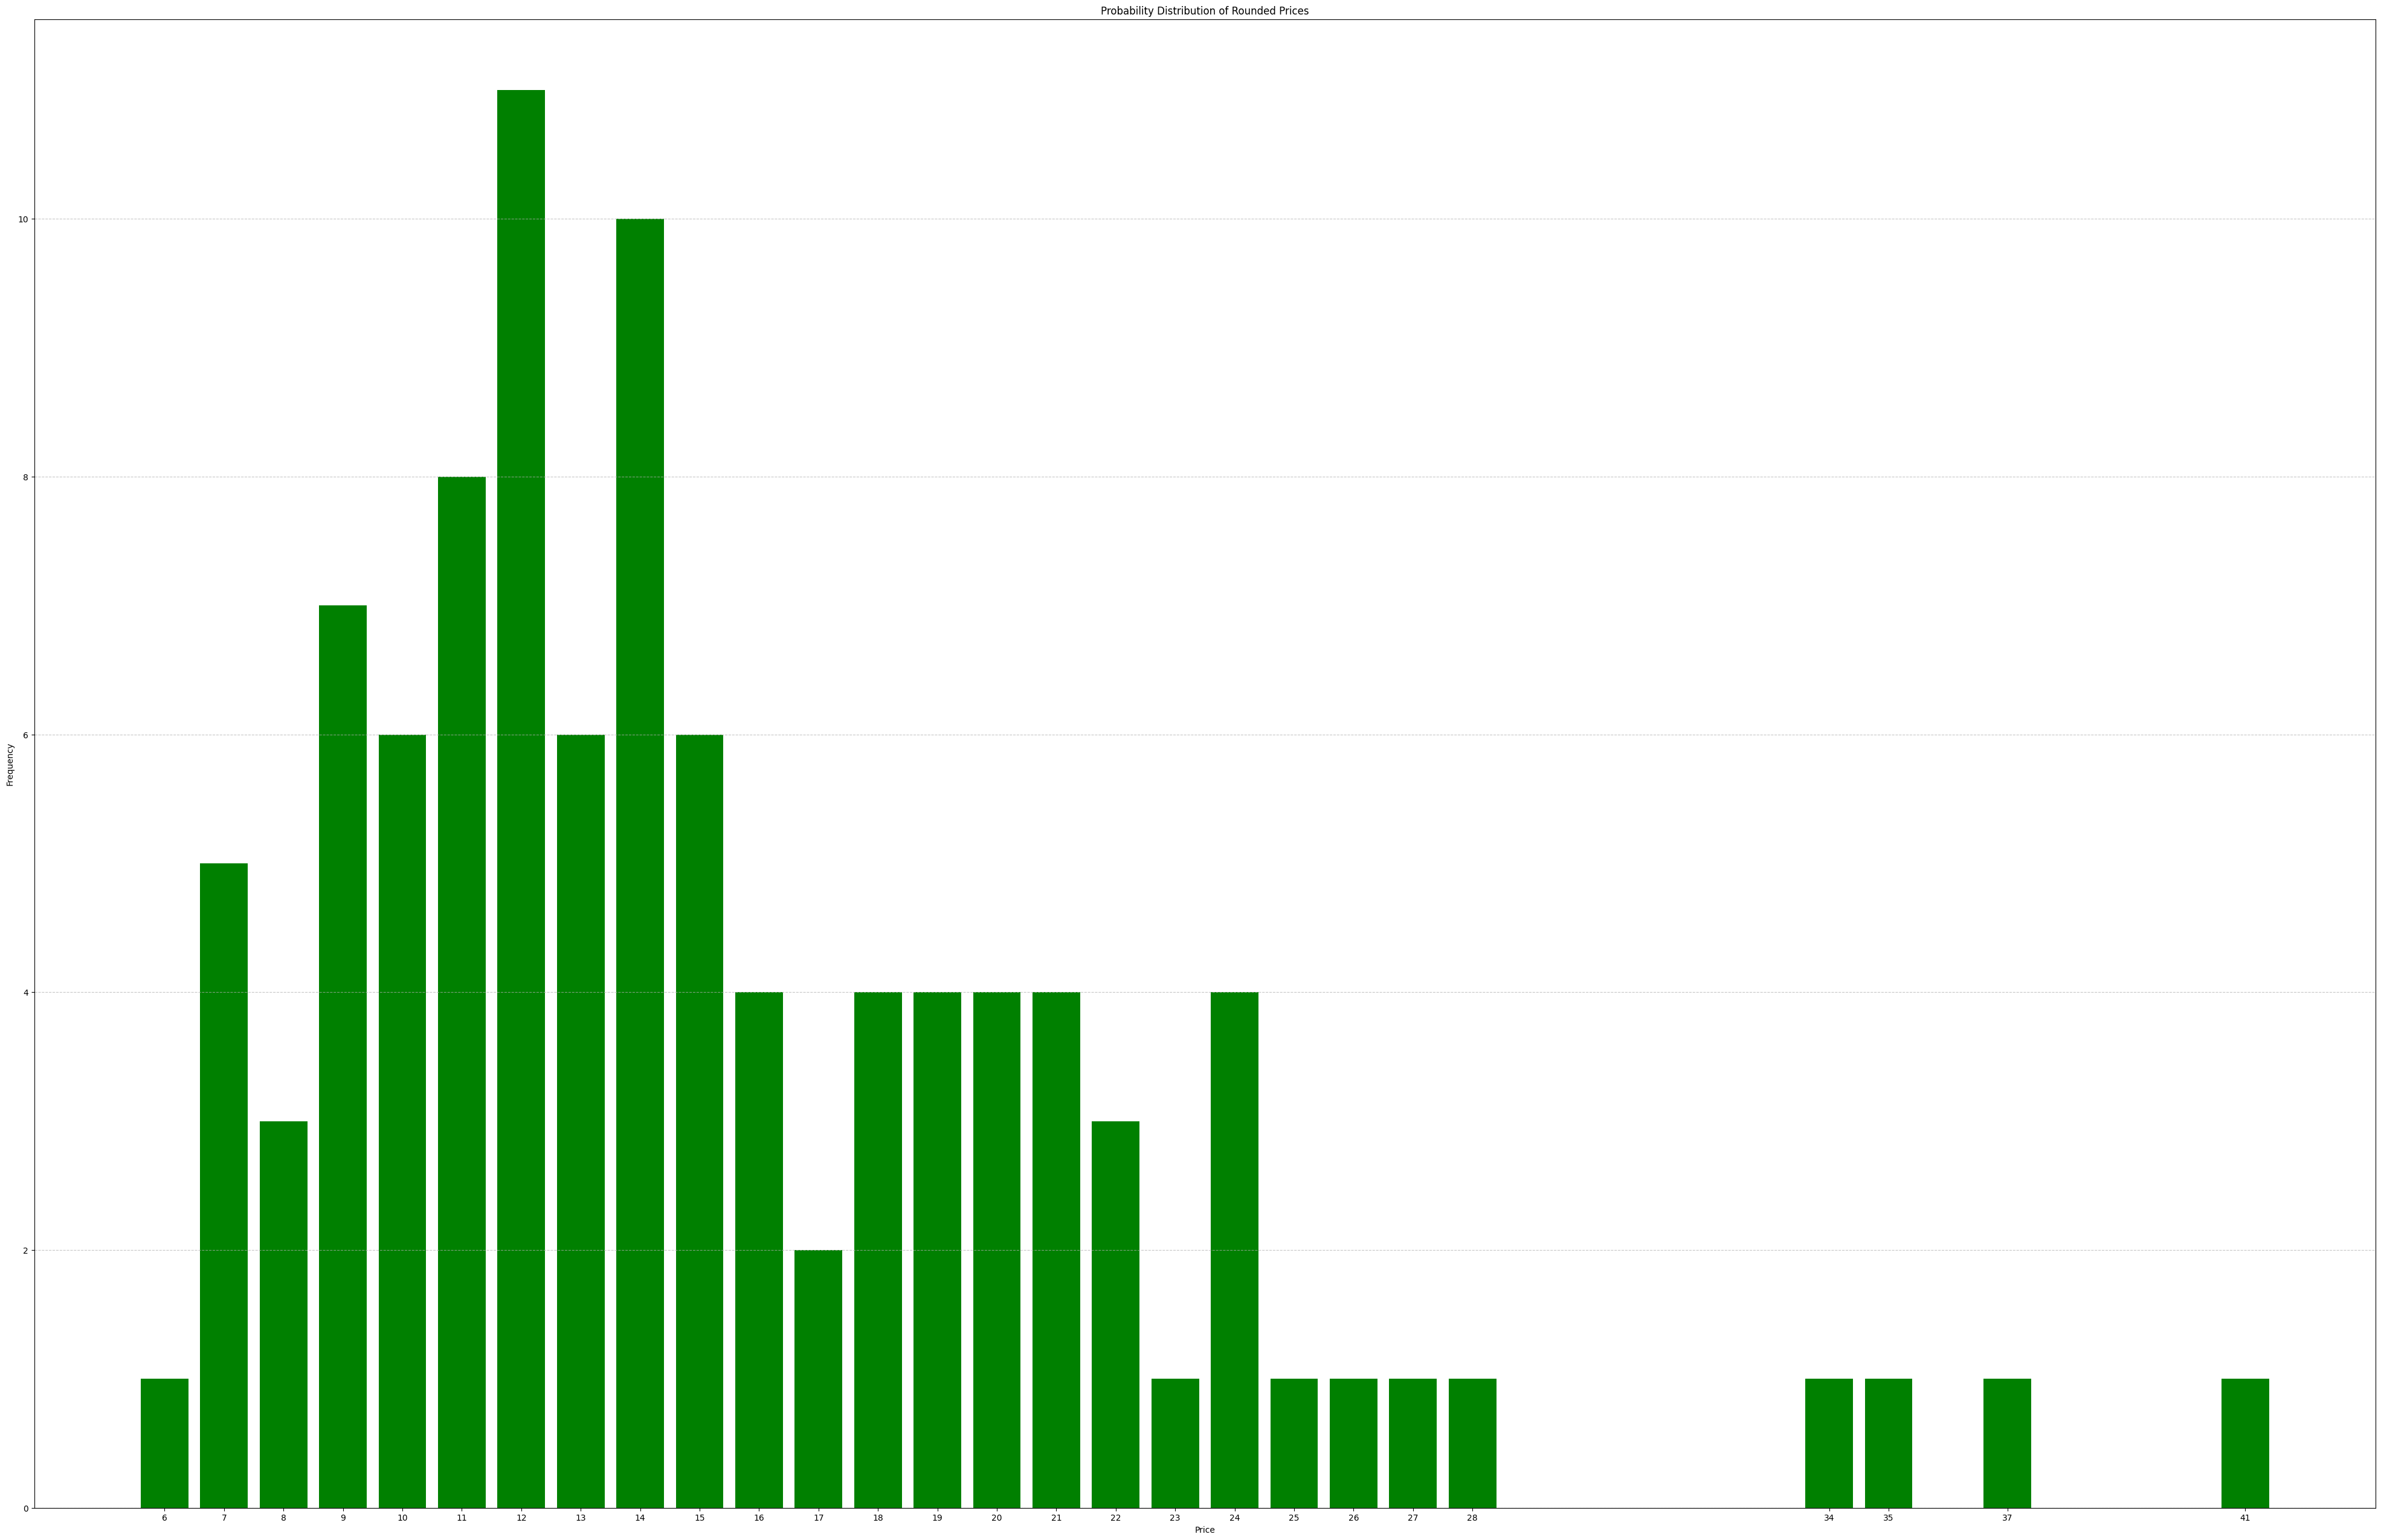

In [3]:
import matplotlib.pyplot as plt

keys = list(price_distribution.keys())
values = list(price_distribution.values())

plt.figure(figsize=(50, 32))
plt.bar(keys, values, color="green")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Probability Distribution of Rounded Prices")
plt.xticks(keys)  # Optional: set x-ticks to match keys
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
from Single_Stock_Monte_Carlo_Functions import single_stock_monte_carlo

single_stock_monte_carlo("AAPL", "5y", 252, 250)

[*********************100%***********************]  1 of 1 completed


133: 1
141: 1
148: 1
154: 1
159: 1
161: 2
166: 1
168: 1
171: 3
172: 1
173: 2
179: 2
180: 1
181: 1
182: 1
185: 1
187: 1
189: 2
190: 1
196: 1
198: 2
202: 3
203: 1
204: 1
206: 2
207: 1
211: 3
212: 2
213: 3
215: 1
216: 2
218: 1
219: 2
220: 4
221: 1
222: 2
224: 3
225: 2
226: 1
227: 3
228: 2
229: 2
230: 3
231: 1
235: 2
236: 2
238: 1
241: 1
245: 1
246: 1
247: 2
249: 2
251: 1
252: 1
254: 1
255: 2
256: 2
257: 2
258: 2
260: 2
261: 2
263: 2
264: 1
265: 2
266: 4
268: 1
269: 2
270: 1
271: 1
274: 3
275: 1
277: 2
278: 1
279: 1
280: 1
281: 1
282: 2
284: 1
285: 1
286: 1
287: 1
288: 1
289: 1
293: 1
295: 1
296: 2
297: 1
298: 1
299: 1
300: 1
302: 1
303: 1
304: 1
305: 1
307: 3
308: 2
314: 1
315: 3
316: 1
319: 1
320: 1
322: 1
323: 2
324: 3
325: 3
326: 1
328: 2
329: 1
331: 1
332: 1
334: 2
336: 1
338: 3
339: 2
341: 1
343: 1
344: 1
345: 1
347: 1
352: 1
354: 1
357: 1
358: 1
360: 2
364: 3
366: 2
368: 1
372: 1
374: 1
376: 2
379: 1
380: 1
383: 1
384: 2
385: 1
389: 1
390: 1
394: 1
397: 1
398: 1
403: 1
405: 1
407: 1